In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sns
#read file 1
df = pd.read_csv('202105_fixed_laua_coverage_r01.csv', header=0)
df.head(10)
df.shape

(374, 40)

In [8]:
df.head()

,laua,laua_name,All Premises,All Matched Premises,SFBB availability (% premises),UFBB (100Mbit/s) availability (% premises),UFBB availability (% premises),Full Fibre availability (% premises),Gigabit availability (% premises),% of premises unable to receive 2Mbit/s,...,Number of premises with 0<2Mbit/s download speed,Number of premises with 2<5Mbit/s download speed,Number of premises with 5<10Mbit/s download speed,Number of premises with 10<30Mbit/s download speed,% of premises with 30<300Mbit/s download speed,% of premises with >=300Mbit/s download speed,% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,% of premises with 10<30Mbit/s download speed
0,S12000033,ABERDEEN CITY,127083,126107,94.4,61.5,55.8,51.2,51.2,0.1,...,65,145,509,5393,38.7,55.8,0.1,0.1,0.4,4.2
1,S12000034,ABERDEENSHIRE,126320,125293,83.2,11.7,11.6,11.6,11.6,2.6,...,3241,3966,4395,8644,71.5,11.6,2.6,3.1,3.5,6.8
2,E07000223,ADUR,29865,29795,98.7,85.7,85.4,1.5,1.5,0.0,...,3,11,32,274,13.3,85.4,0.0,0.0,0.1,0.9
3,E07000026,ALLERDALE,51812,51555,92.6,3.2,3.2,3.2,3.2,1.2,...,601,502,513,1940,89.4,3.2,1.2,1.0,1.0,3.7
4,E07000032,AMBER VALLEY,61441,61100,95.2,30.8,27.4,24.3,24.3,0.1,...,61,134,258,2151,67.9,27.4,0.1,0.2,0.4,3.5


In [9]:
#Checking null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 40 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   laua                                                          374 non-null    object 
 1   laua_name                                                     374 non-null    object 
 2   All Premises                                                  374 non-null    int64  
 3   All Matched Premises                                          374 non-null    int64  
 4   SFBB availability (% premises)                                374 non-null    float64
 5   UFBB (100Mbit/s) availability (% premises)                    374 non-null    float64
 6   UFBB availability (% premises)                                374 non-null    float64
 7   Full Fibre availability (% premises)                          374 non-n

In [88]:
#select specific columns I need: Name of area, number of house based on download speed
subdf = df[['laua',
            'laua_name',
            'Full Fibre availability (% premises)',
            'SFBB availability (% premises)',
            'UFBB availability (% premises)',
            '% of premises with 0<2Mbit/s download speed',
            '% of premises with 2<5Mbit/s download speed',
            '% of premises with 5<10Mbit/s download speed'
            
        ]]
#Change 'laua_name' to 'Name', speed - simplify for join
subdf1 = subdf.rename({'laua_name':'Name'},
                      
                      
                      
                      
                      
                      axis='columns')
subdf1.head(45)

,laua,Name,Full Fibre availability (% premises),SFBB availability (% premises),UFBB availability (% premises),% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed
0,S12000033,ABERDEEN CITY,51.2,94.4,55.8,0.1,0.1,0.4
1,S12000034,ABERDEENSHIRE,11.6,83.2,11.6,2.6,3.1,3.5
2,E07000223,ADUR,1.5,98.7,85.4,0.0,0.0,0.1
3,E07000026,ALLERDALE,3.2,92.6,3.2,1.2,1.0,1.0
4,E07000032,AMBER VALLEY,24.3,95.2,27.4,0.1,0.2,0.4
5,S12000041,ANGUS,7.6,87.0,19.7,1.4,2.3,3.1
6,N09000001,ANTRIM AND NEWTOWNABBEY,69.9,92.3,80.2,1.5,1.2,0.7
7,N09000011,ARDS AND NORTH DOWN,77.8,95.1,79.0,0.6,0.5,0.8
8,S12000035,ARGYLL AND BUTE,1.6,78.2,1.6,3.2,2.8,4.4
9,N09000002,"ARMAGH CITY, BANBRIDGE AND CRAIGAVON",66.5,89.0,65.9,1.5,1.5,1.6


In [79]:
#read file 2
df2 = pd.read_excel('2001-la-class-dataset-post0409-boundaries.xlsx', header=0)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 18 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Name                                                               335 non-null    object 
 1   Region                                                             332 non-null    object 
 2   District Code                                                      332 non-null    object 
 3   ONS code                                                           326 non-null    object 
 4   Total Population1                                                  333 non-null    float64
 5   Major Urban Population                                             327 non-null    float64
 6   Large Urban Population                                             327 non-null    float64
 7   Other Urban Population    

,Name,Region,District Code,ONS code,Total Population1,Major Urban Population,Large Urban Population,Other Urban Population,Total Urban Population (excluding Large Market Town population)2,Large Market Town Population,Rural Town Population,Rural Town Population (including Large Market Town population)2,Village Population,Dispersed Population,Total Rural Population (including Large Market Town population)2,Rural% (including Large Market Town population)2,Classification,Numerical classification
0,Adur,South East,45UB,E07000223,59571.0,0.0,59116.0,0.0,59116.0,0.0,0.0,0.0,0.0,455.0,455.0,0.763794,LU,2.0
1,Allerdale,North West,16UB,E07000026,93577.0,0.0,0.0,0.0,0.0,28261.0,33732.0,61993.0,22499.0,9085.0,93577.0,100.000000,R80,6.0
2,Amber Valley,East Midlands,17UB,E07000032,116484.0,0.0,41215.0,24848.0,66063.0,21972.0,9745.0,31717.0,13618.0,5086.0,50421.0,43.285773,SR,4.0
3,Arun,South East,45UC,E07000224,140841.0,0.0,56976.0,73673.0,130649.0,0.0,3467.0,3467.0,4641.0,2084.0,10192.0,7.236529,LU,2.0
4,Ashfield,East Midlands,37UB,E07000170,111295.0,0.0,29121.0,80565.0,109686.0,0.0,661.0,661.0,0.0,948.0,1609.0,1.445707,OU,3.0


In [36]:
df2.head()
#Capitalize Name value for join
df2['Name']=df2['Name'].str.upper()

In [37]:
#select specific columns I need: Name, total population, Classification, Numeric classification
subdf2 = df2[['Name', 'Total Population1', 'Classification','Numerical classification']]

In [38]:
df2.head()
df2.shape

(339, 18)

In [86]:
#join subdf1 and subdf2 (inner join)
innerjoindf = pd.merge(subdf1,
                  subdf2,
                  on ='Name',
                  how ='inner')
innerjoindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 295
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   laua                                          296 non-null    object 
 1   Name                                          296 non-null    object 
 2   Full Fibre availability (% premises)          296 non-null    float64
 3   SFBB availability (% premises)                296 non-null    float64
 4   UFBB availability (% premises)                296 non-null    float64
 5   % of premises with 0<2Mbit/s download speed   296 non-null    float64
 6   % of premises with 2<5Mbit/s download speed   296 non-null    float64
 7   % of premises with 5<10Mbit/s download speed  296 non-null    float64
 8   Total Population1                             296 non-null    float64
 9   Classification                                296 non-null    obj

In [89]:
innerjoindf.head(45)

,laua,Name,Full Fibre availability (% premises),SFBB availability (% premises),UFBB availability (% premises),% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,Total Population1,Classification,Numerical classification
0,E07000223,ADUR,1.5,98.7,85.4,0.0,0.0,0.1,59571.0,LU,2.0
1,E07000026,ALLERDALE,3.2,92.6,3.2,1.2,1.0,1.0,93577.0,R80,6.0
2,E07000032,AMBER VALLEY,24.3,95.2,27.4,0.1,0.2,0.4,116484.0,SR,4.0
3,E07000224,ARUN,8.3,96.5,10.6,0.1,0.1,0.2,140841.0,LU,2.0
4,E07000170,ASHFIELD,3.9,98.0,86.6,0.0,0.4,0.1,111295.0,OU,3.0
5,E07000105,ASHFORD,9.4,90.8,46.5,0.3,1.4,1.6,102553.0,SR,4.0
6,E07000200,BABERGH,10.6,93.9,14.6,0.4,0.4,0.4,83523.0,R80,6.0
7,E09000002,BARKING AND DAGENHAM,51.3,98.3,89.8,0.0,0.4,0.4,164138.0,MU,1.0
8,E09000003,BARNET,22.5,97.2,56.7,0.0,0.0,0.1,314936.0,MU,1.0
9,E08000016,BARNSLEY,22.9,97.9,66.6,0.1,0.2,0.1,218101.0,OU,3.0


In [82]:
# Here I am trying to compare the availability of different types of braodband in different types of area. 
# Full Fibre = Fastest and most recently rolled out option
# UFBB (UltraFast Broadband) = older & slower 
# SFBB (Superfast Broadband) = oldest and slowest

meanFF = innerjoindf.groupby(['Classification'], as_index=False)['Full Fibre availability (% premises)'].mean()
meanFF
meanSFBB = innerjoindf.groupby(['Classification'], as_index=False)['SFBB availability (% premises)'].mean()
meanSFBB
meanUFBB = innerjoindf.groupby(['Classification'], as_index=False)['UFBB availability (% premises)'].mean()
meanUFBB

,Classification,UFBB availability (% premises)
0,LU,73.864706
1,MU,77.726761
2,OU,70.460000
3,R50,37.687805
4,R80,26.155319
5,SR,53.037500


In [83]:
# Re-indexing to order from most urban - most rural
# MU = Major Urban
# LU = Large Urban
# OU = Other Urban
# SR = Semi Rural
# R50 = 50% rural
# R80 = 80% Rural
meanFF=meanFF.reindex([1,0,2,5,3,4])
meanFF
meanSFBB=meanSFBB.reindex([1,0,2,5,3,4])
meanSFBB
meanUFBB=meanUFBB.reindex([1,0,2,5,3,4])
meanUFBB

,Classification,UFBB availability (% premises)
1,MU,77.726761
0,LU,73.864706
2,OU,70.460000
5,SR,53.037500
3,R50,37.687805
4,R80,26.155319


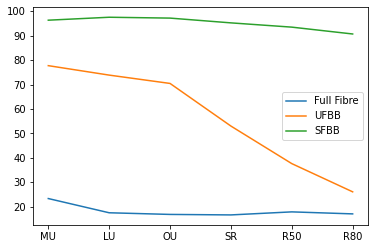

In [84]:
# This plot shows the results (mean % of premises that can receive each option in each area type)
# I think this shows the trends well, the oldest option (SFBB) has good coverage across all areas and the newest (Full Fibre)
# has only attained around 25% coverage in the most urbanised regions. 
# All broadband options show a general trend of coverage decreasing as regions become more rural, this is particularly evident
# in the UFBB coverage line
plt.plot(meanFF['Classification'],meanFF['Full Fibre availability (% premises)'],label ='Full Fibre')
plt.plot(meanUFBB['Classification'],meanUFBB['UFBB availability (% premises)'],label ='UFBB')
plt.plot(meanSFBB['Classification'],meanSFBB['SFBB availability (% premises)'],label ='SFBB')
plt.legend()
plt.show()

In [46]:
# With this section I was thinking about how low download speeds can affect peoples internet experience.
# One thing highlighted during the pandemic was the importance of high quality connections to enable children to access online
# learning, particularly live lessons with their class. For video conferencing, recommended minimum download speeds are around
# 8MBps so I have filtered the dataset to find the areas that do do not meet this (and therefore may not be able to access online learning)
new_df = innerjoindf[(innerjoindf['% of premises with 0<2Mbit/s download speed'] >=1) | (innerjoindf['% of premises with 2<5Mbit/s download speed'] >=1) |(innerjoindf['% of premises with 5<10Mbit/s download speed'] >=1)]
new_df
# We see from the results there are 49 areas returned
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 284
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   laua                                          49 non-null     object 
 1   Name                                          49 non-null     object 
 2   Full Fibre availability (% premises)          49 non-null     float64
 3   SFBB availability (% premises)                49 non-null     float64
 4   UFBB availability (% premises)                49 non-null     float64
 5   % of premises with 0<2Mbit/s download speed   49 non-null     float64
 6   % of premises with 2<5Mbit/s download speed   49 non-null     float64
 7   % of premises with 5<10Mbit/s download speed  49 non-null     float64
 8   Total Population1                             49 non-null     float64
 9   Classification                                49 non-null     obje

In [47]:
new_df.head(49)

,laua,Name,Full Fibre availability (% premises),SFBB availability (% premises),UFBB availability (% premises),% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,Total Population1,Classification,Numerical classification
1,E07000026,ALLERDALE,3.2,92.6,3.2,1.2,1.0,1.0,93577.0,R80,6.0
5,E07000105,ASHFORD,9.4,90.8,46.5,0.3,1.4,1.6,102553.0,SR,4.0
27,E07000143,BRECKLAND,21.8,91.1,23.1,0.7,1.0,1.2,121449.0,R80,6.0
43,E07000028,CARLISLE,6.0,94.1,48.1,0.8,0.8,1.0,100679.0,SR,4.0
53,E07000225,CHICHESTER,21.2,90.5,22.8,0.3,0.6,1.2,106518.0,R80,6.0
58,E06000052,CORNWALL,32.0,87.2,34.9,0.3,0.7,1.3,499399.0,R80,6.0
61,E07000163,CRAVEN,12.7,92.1,17.8,1.0,0.8,1.1,53578.0,R80,6.0
65,E06000005,DARLINGTON,2.9,94.5,83.5,0.7,1.2,1.1,97712.0,OU,3.0
68,E07000035,DERBYSHIRE DALES,9.0,89.9,9.0,0.5,1.2,1.8,69616.0,R80,6.0
74,E07000040,EAST DEVON,35.0,89.5,35.7,0.5,1.5,1.9,125345.0,R50,5.0


c:\users\user\pycharmprojects\nanosessions\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


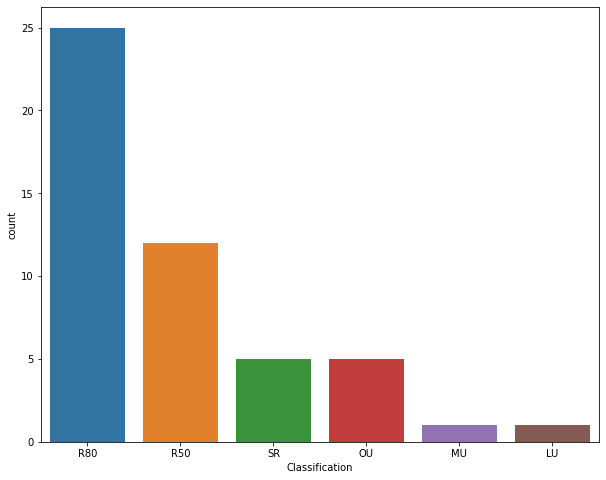

(None,)

In [74]:
# The histogram shows the count of areas that do not meet minimum speed requirements by classifiction,
# we see clear correlation to area type with most rural areas having the highest count of inadequate speeds
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot('Classification',data = new_df,order = new_df['Classification'].value_counts().index)
plt.show(),

In [49]:
df2 = pd.read_csv('area_grid.csv', header=0)
df2.info()
df2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District          374 non-null    object 
 1   County            331 non-null    object 
 2   District Code     374 non-null    object 
 3   Latitude          374 non-null    float64
 4   Longitude         374 non-null    float64
 5   Postcodes         374 non-null    int64  
 6   Active Postcodes  374 non-null    int64  
 7   Households        374 non-null    int64  
 8   Population        374 non-null    int64  
 9   Type              374 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 29.3+ KB


,District,County,District Code,Latitude,Longitude,Postcodes,Active Postcodes,Households,Population,Type
0,Aberdeen City,NaN,S12000033,57.149502,-2.133050,14396,6273,103304,222604,Council Area
1,Aberdeenshire,NaN,S12000034,57.353298,-2.322470,21516,9777,104592,252583,Council Area
2,Adur,West Sussex,E07000223,50.833099,-0.285009,3027,1793,26952,61167,Local Authority District
3,Allerdale,Cumbria,E07000026,54.713100,-3.361350,5540,4086,42362,96468,Local Authority District
4,Amber Valley,Derbyshire,E07000032,53.037701,-1.424460,4982,2831,52602,122335,Local Authority District
5,Angus,NaN,S12000041,56.619400,-2.749280,4581,3995,51537,115791,Council Area
6,Antrim and Newtownabbey,NaN,N09000001,54.698299,-6.052290,4195,3359,53535,137413,District
7,Ards and North Down,NaN,N09000011,54.607300,-5.666840,5476,4082,64022,155307,District
8,Argyll and Bute,NaN,S12000035,56.033199,-5.213120,4159,3416,40013,87912,Council Area
9,"Armagh City, Banbridge and Craigavon",NaN,N09000002,54.385201,-6.421420,5964,5178,74395,196898,District


In [50]:
#extract data from certain columns
sdf2 = df2[['District', 'District Code', 'Latitude','Longitude', 'Population']]
sdf2.head()

,District,District Code,Latitude,Longitude,Population
0,Aberdeen City,S12000033,57.149502,-2.133050,222604
1,Aberdeenshire,S12000034,57.353298,-2.322470,252583
2,Adur,E07000223,50.833099,-0.285009,61167
3,Allerdale,E07000026,54.713100,-3.361350,96468
4,Amber Valley,E07000032,53.037701,-1.424460,122335


In [76]:
#join subdf1 and subdf2 (inner join)
locationdf = pd.merge(innerjoindf,sdf2,left_on ='laua',right_on = 'District Code',how ='inner')
# locationdf.info()
locationdf.head()

,laua,Name,Full Fibre availability (% premises),SFBB availability (% premises),UFBB availability (% premises),% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,Total Population1,Classification,Numerical classification,District,District Code,Latitude,Longitude,Population
0,E07000223,ADUR,1.5,98.7,85.4,0.0,0.0,0.1,59571.0,LU,2.0,Adur,E07000223,50.833099,-0.285009,61167
1,E07000026,ALLERDALE,3.2,92.6,3.2,1.2,1.0,1.0,93577.0,R80,6.0,Allerdale,E07000026,54.713100,-3.361350,96468
2,E07000032,AMBER VALLEY,24.3,95.2,27.4,0.1,0.2,0.4,116484.0,SR,4.0,Amber Valley,E07000032,53.037701,-1.424460,122335
3,E07000224,ARUN,8.3,96.5,10.6,0.1,0.1,0.2,140841.0,LU,2.0,Arun,E07000224,50.808701,-0.597137,149515
4,E07000170,ASHFIELD,3.9,98.0,86.6,0.0,0.4,0.1,111295.0,OU,3.0,Ashfield,E07000170,53.087299,-1.248920,119534


In [64]:
new_df = locationdf[(locationdf['% of premises with 0<2Mbit/s download speed'] >=1) | (locationdf['% of premises with 2<5Mbit/s download speed'] >=1) |(locationdf['% of premises with 5<10Mbit/s download speed'] >=1)]
new_df
new_df.head()

,laua,Name,Full Fibre availability (% premises),SFBB availability (% premises),UFBB availability (% premises),% of premises with 0<2Mbit/s download speed,% of premises with 2<5Mbit/s download speed,% of premises with 5<10Mbit/s download speed,Total Population1,Classification,Numerical classification,District,District Code,Latitude,Longitude,Population
1,E07000026,ALLERDALE,3.2,92.6,3.2,1.2,1.0,1.0,93577.0,R80,6.0,Allerdale,E07000026,54.713100,-3.361350,96468
5,E07000105,ASHFORD,9.4,90.8,46.5,0.3,1.4,1.6,102553.0,SR,4.0,Ashford,E07000105,51.135300,0.837573,117922
27,E07000143,BRECKLAND,21.8,91.1,23.1,0.7,1.0,1.2,121449.0,R80,6.0,Breckland,E07000143,52.581001,0.868370,130502
43,E07000028,CARLISLE,6.0,94.1,48.1,0.8,0.8,1.0,100679.0,SR,4.0,Carlisle,E07000028,54.906700,-2.896360,107513
53,E07000225,CHICHESTER,21.2,90.5,22.8,0.3,0.6,1.2,106518.0,R80,6.0,Chichester,E07000225,50.874100,-0.767290,113880


In [65]:
#Visualize
# !pip install plotly
# !pip install geojson_rewind

import json
import folium
from folium.plugins import HeatMap

In [66]:
ukmap = folium.Map(location = [54.76999101318324, -2.8478385244334445], zoom_start = 5.5) #longitude, latitude
# ukmap

In [70]:
#Display the areas which do not reach the min requirment - download speed around 8MBps
#Simplify the dots on the map to be easier to view

from folium.plugins import MarkerCluster

l1 = []
l2 = []

mcluster = MarkerCluster().add_to(ukmap)
for a in new_df.index:
    folium.Marker(location = [new_df.loc[a,"Latitude"], new_df.loc[a,"Longitude"]],
                  zoom_start = 5.5,
                  tooltip = new_df.loc[a,"Name"]).add_to(mcluster)
    l1.append(new_df.loc[a,"Latitude"])
    l2.append(new_df.loc[a,"Longitude"])
            
ukmap